# Task2: Handling images data (Folders) using PyTorch (Tensors, Datasets, and Dataloaders)

## Task Description:
Read the dataset provided as a CSV file, create a dataset class in PyTorch, and then implement a DataLoader to load batches of the data. Finally, visualize some of the images from the dataset.
Data: https://www.kaggle.com/datasets/hafiznouman786/potato-plant-diseases-data

In [1]:
from IPython.display import clear_output

In [2]:
!pip install opendatasets
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download hafiznouman786/potato-plant-diseases-data
!unzip /content/potato-plant-diseases-data.zip
clear_output()

In [3]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import models,transforms
from torchvision.utils import make_grid
import os
import glob
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))  # Get the folder names and sort them
        self.image_paths = []
        self.labels = []

        # Iterate through each class directory and collect image paths and labels
        for label, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_path in glob.glob(os.path.join(class_dir, '*')):
                self.image_paths.append(img_path)
                self.labels.append(label)

        # Shuffle the dataset
        combined = list(zip(self.image_paths, self.labels))
        random.shuffle(combined)
        self.image_paths[:], self.labels[:] = zip(*combined)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
dataset = CustomDataset(root_dir='/content/PotatoPlants', transform=transform)

In [6]:
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [7]:
b_size = 32
train_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True)
val_loader =   DataLoader(val_dataset, batch_size=b_size)
test_loader =  DataLoader(test_dataset, batch_size=b_size)

In [8]:
# Example: Load a batch from DataLoader
dataiter = iter(train_loader)
images, labels = next(dataiter)
# Convert tensors to numpy arrays for plotting
images_np = images.numpy()
labels_np = labels.numpy()

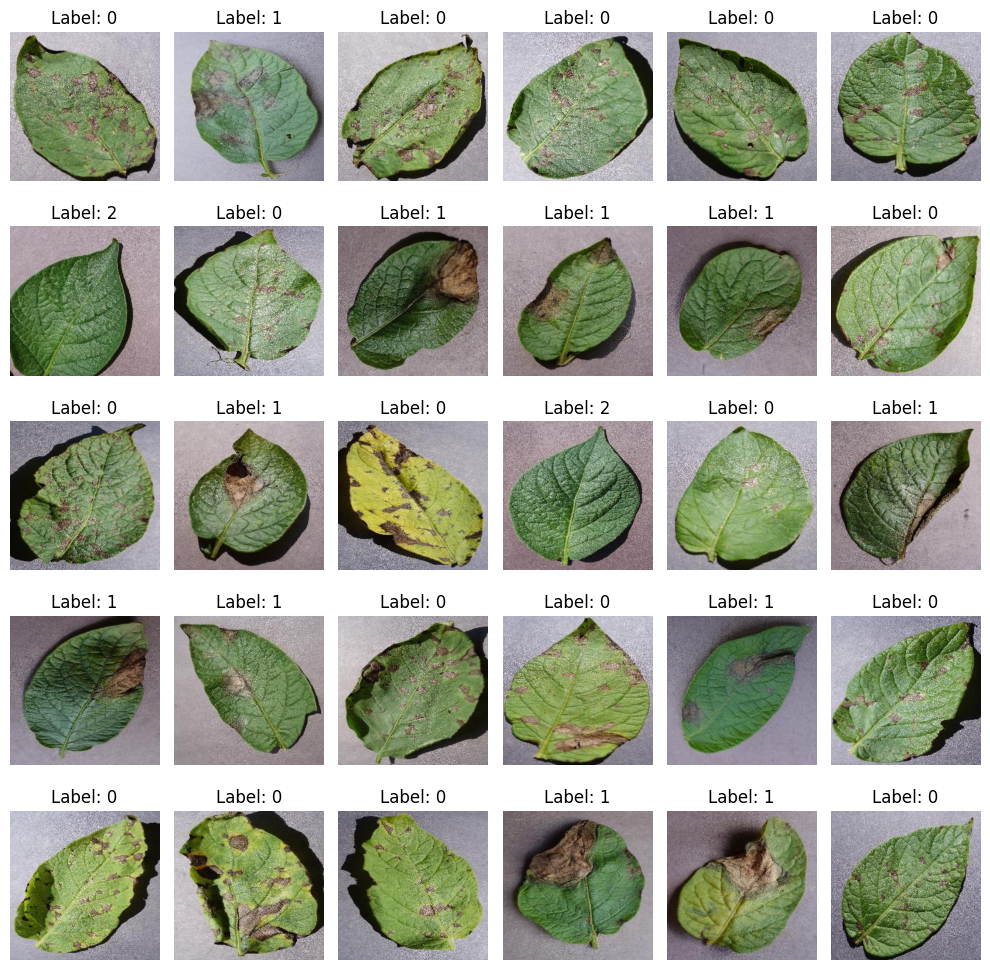

In [9]:
# Create a grid of images
num_images = len(images_np)
rows = int(np.sqrt(num_images))
cols = num_images // rows
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(np.transpose(images_np[i], (1, 2, 0)), cmap='gray')
    ax.axis('off')

    # Show true and predicted labels
    ax_title = f"Label: {labels_np[i]}"
    ax.set_title(ax_title)

plt.tight_layout()
plt.show()